<a href="https://colab.research.google.com/github/mohamedhegazy010091-spec/B-J-Biscuit-Business-Analysis-Dashboard/blob/main/progect_cleansy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/fake_customer_data_with_errors.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/fake_customer_data_with_errors.csv'

# 1- Explore Data

In [ ]:
# df.head()
# df.tail()
df.sample(5)

In [ ]:
df.shape

In [ ]:
df.size

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.duplicated().sum()

In [ ]:
df.nunique()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

# 2- Clean Data

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df=df.drop(['Unnamed','  Gender  '],axis=1)

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

In [ ]:
df['Gender'].unique()

In [ ]:
df['Gender'] = df['Gender'].str.lower()

In [ ]:
df['Gender'].unique()

In [ ]:
df['Gender']= df['Gender'].replace({'m':'male','f':'female'})

In [ ]:
df['Gender'].unique()

In [ ]:
df.fillna({'gender':'male'},inplace=True)
# df['Gender'].fillna('male',inplace=True)

In [ ]:
df['Gender'].unique()

In [ ]:
age_mean = df['Age'].mean()
df.fillna({'Age':'age_mean'},inplace=True)

In [ ]:
df.info()

In [ ]:
df.fillna({'ProductCategory':'unknown'},inplace=True)

In [ ]:
df['PurchaseDate'].dtypes

In [ ]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'],format='mixed',dayfirst=True,errors='coerce')

In [ ]:
df.loc[df['PurchaseDate'].isna(),['PurchaseDate']]

In [ ]:
df['Age'] = pd.to_numeric(df['Age'],errors='coerce')

In [ ]:
df.loc[df['Age']<0,'Age']

In [ ]:
df['Age'] = df['Age'].apply(lambda x :df['Age'].mean() if x <0 else x)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

# 3- Data Analysis



In [ ]:
df.sort_values(by='PurchaseAmount',ascending=False)

In [ ]:
df['ProductCategory'].value_counts()

In [ ]:
df['Rating'].sort_index().head(10)

In [ ]:
gender_counts = df['Gender'].value_counts()
gender_counts

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

In [ ]:
sns.histplot(df['Age'].sort_values(),bins=40,kde=True)
plt.title('Age Distribution')

In [ ]:
sns.boxenplot(data=df,x='Gender',y='Age')
plt.title('Age Distribution by Gender')

In [ ]:
corr = df[['Age','PurchaseAmount','Rating']].corr()
corr

In [ ]:
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=3)
plt.title('Correlation Matrix')

In [ ]:
sns.barplot(data=df,x='Gender',y='PurchaseAmount',estimator='mean',color='blue')
plt.title('Purchase Amount by Gender')

In [ ]:
sns.scatterplot(data=df,x='Age',y='PurchaseAmount',hue='Gender',style='Gender')
plt.title('Purchase Amount vs Age')

In [53]:
df['Month'] = df['PurchaseDate'].dt.month

In [58]:
df.head()

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Month,Month_name
4,CUST1004,Ali Ibrahim,73.000000,male,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,12,December
7,CUST1007,Alaa Hassan,200.000000,female,alaa.hassan@hotmail.com,987654321.0,318.43,2024-05-17,Toys,10.0,5,May
10,CUST1010,Ahmed Smith,85.044542,male,ahmed.smith@gmail.com,987654321.0,882.19,2025-06-24,unknown,3.0,6,June
15,CUST1015,Ali Ibrahim,18.000000,female,ali.ibrahim@hotmail.com,123456789.0,337.49,2024-06-25,Home,1.0,6,June
16,CUST1016,Fatma Hassan,200.000000,female,fatma.hassan@gmail.com,987654321.0,272.08,2024-01-09,Toys,2.0,1,January


In [61]:
df['Month_name'] = df['PurchaseDate'].dt.month_name()

In [63]:
df['Month_name'].value_counts().sort_index()

,count
Month_name,
April,56
August,33
December,61
February,44
January,51
July,45
June,53
March,40
May,57


In [64]:
months_order = ['January','February','March','April','May','June',
                'July','August','September','October','November','December']

df['Month_name'] = pd.Categorical(df['Month_name'], categories=months_order, ordered=True)

df['Month_name'].value_counts().sort_index()


,count
Month_name,
January,51
February,44
March,40
April,56
May,57
June,53
July,45
August,33
September,25


In [65]:
df.head()

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Month,Month_name
4,CUST1004,Ali Ibrahim,73.000000,male,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,12,December
7,CUST1007,Alaa Hassan,200.000000,female,alaa.hassan@hotmail.com,987654321.0,318.43,2024-05-17,Toys,10.0,5,May
10,CUST1010,Ahmed Smith,85.044542,male,ahmed.smith@gmail.com,987654321.0,882.19,2025-06-24,unknown,3.0,6,June
15,CUST1015,Ali Ibrahim,18.000000,female,ali.ibrahim@hotmail.com,123456789.0,337.49,2024-06-25,Home,1.0,6,June
16,CUST1016,Fatma Hassan,200.000000,female,fatma.hassan@gmail.com,987654321.0,272.08,2024-01-09,Toys,2.0,1,January


In [67]:
monthly_sales =df.groupby('Month_name')['PurchaseAmount'].sum()

/tmp/ipython-input-1540223552.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales =df.groupby('Month_name')['PurchaseAmount'].sum()


<Axes: xlabel='Month_name'>

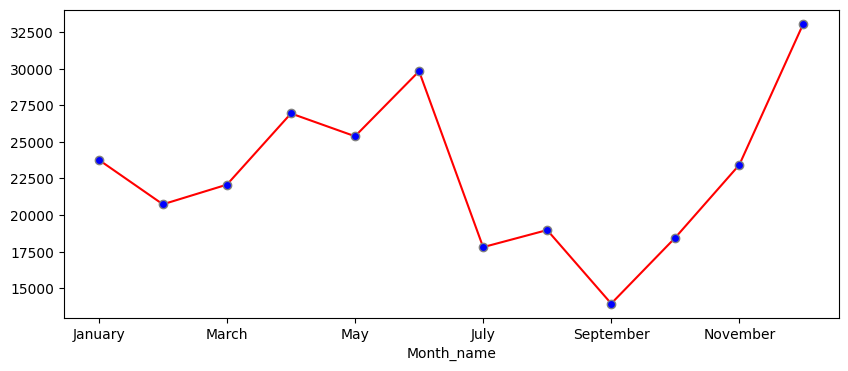

In [74]:
from matplotlib.markers import MarkerStyle
monthly_sales.plot(figsize=(10,4),marker='o',color='r',markerfacecolor='blue',markeredgecolor='gray')

In [75]:
df.to_csv('clean_data',index=False)